In [31]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import re
print('library imported')

library imported


In [32]:
with open('SMSSpamCollection.txt','r') as file:
    data = file.read()

In [33]:
len(data.split('\n'))
# total no. of rows in text file

5575

In [34]:
x = []
y = []
for lin in data.split('\n'):
    if len(lin.split('\t')) == 2:
        y.append(lin.split('\t')[0])
        x.append(lin.split('\t')[1])

In [35]:
len(x),    len(y)

(5574, 5574)

In [36]:
# Dataframe
df = pd.DataFrame({'message':x,'label':y})
df.head()

,message,label
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham


In [37]:
df['label'].value_counts()

label
ham     4827
spam     747
Name: count, dtype: int64

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  5574 non-null   object
 1   label    5574 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [39]:
for i in range(len(df)):
    clean_data = re.sub('[^a-zA-Z]',' ',df['message'][i])
    lower_case_data = clean_data.lower()
    df['message'][i] = lower_case_data

In [40]:
df['message'][52]

'k fyi x has a ride early tomorrow morning but he s crashing at our place tonight'

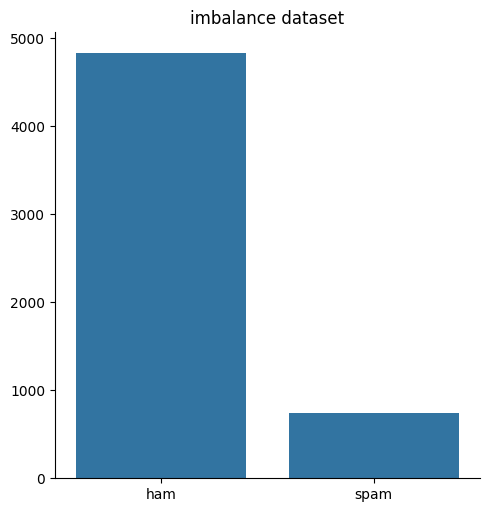

In [41]:
clas = list(df['label'].value_counts().index)
val = list(df['label'].value_counts().values)

sns.catplot(x= clas , y= val , kind= 'bar')
plt.title('imbalance dataset')
plt.show()

In [42]:
ham = df[df['label']=='ham']
spam = df[df['label']=='spam']


In [43]:
spam.head()

,message,label
2,free entry in a wkly comp to win fa cup fina...,spam
5,freemsg hey there darling it s been week s n...,spam
8,winner as a valued network customer you have...,spam
9,had your mobile months or more u r entitle...,spam
11,six chances to win cash from to po...,spam


In [44]:
ham = ham.sample(1000)

In [45]:
ham.shape

(1000, 2)

In [46]:
balance_df = pd.concat([ham,spam])
balance_df.head()

,message,label
3628,still chance there if you search hard you wil...,ham
4596,yo sorry was in the shower sup,ham
3135,ok going to sleep hope i can meet her,ham
5085,aiya we discuss later lar pick up at i...,ham
912,i am sorry it hurt you,ham


In [47]:
balance_df['label'].value_counts()

label
ham     1000
spam     747
Name: count, dtype: int64

In [48]:
balance_df.isnull().sum()

message    0
label      0
dtype: int64

In [49]:
balance_df.duplicated().sum()

137

In [50]:
balance_df['label'] = balance_df['label'].map({'ham':0,'spam':1})

In [51]:
x = balance_df['message']
y = balance_df['label']

In [52]:
x2 = x.values
x2

array(['still chance there  if you search hard you will get it  let have a try   ',
       'yo sorry was in the shower sup',
       'ok going to sleep  hope i can meet her ', ...,
       'had your contract mobile    mnths  latest motorola  nokia etc  all free  double mins   text on orange tariffs  text yes for callback  no to remove from records ',
       'reminder from o   to get      pounds free call credit and details of great offers pls reply   this text with your valid name  house no and postcode',
       'this is the  nd time we have tried   contact u  u have won the       pound prize    claim is easy  call              now   only   p per minute  bt national rate '],
      dtype=object)

In [55]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
# BOW

In [56]:
from sklearn.naive_bayes import MultinomialNB , GaussianNB , BernoulliNB

In [57]:
bow = CountVectorizer(max_features=2000,stop_words='english')

In [58]:
x_data = bow.fit_transform(x2)

In [59]:
x = x_data.toarray()

In [60]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [ ]:
x.shape

(1747, 2000)

In [ ]:
i am going agra
i am going delhi
i am going jaipur  jaipur



agra delhi jaipur
1      0       0
0      1       0
0      0       2





In [61]:
x2

array(['still chance there  if you search hard you will get it  let have a try   ',
       'yo sorry was in the shower sup',
       'ok going to sleep  hope i can meet her ', ...,
       'had your contract mobile    mnths  latest motorola  nokia etc  all free  double mins   text on orange tariffs  text yes for callback  no to remove from records ',
       'reminder from o   to get      pounds free call credit and details of great offers pls reply   this text with your valid name  house no and postcode',
       'this is the  nd time we have tried   contact u  u have won the       pound prize    claim is easy  call              now   only   p per minute  bt national rate '],
      dtype=object)

In [ ]:
x[0:100]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [ ]:
x.shape   , y.shape

((1747, 2000), (1747,))

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [64]:
# naive_bayes algorithm
from sklearn.naive_bayes import  MultinomialNB


In [65]:
Mnb = MultinomialNB()

In [66]:
Mnb.fit(x_train,y_train)

MultinomialNB()

In [ ]:
Mnb.score(x_train,y_train)
# on training data

0.9799570508231925

In [ ]:
Mnb.score(x_test,y_test)

0.9514285714285714

In [ ]:
pred = Mnb.predict(x_test)

In [ ]:
from sklearn.metrics import  confusion_matrix , classification_report

In [ ]:
confusion_matrix(y_test,pred)

array([[198,  10],
       [  7, 135]], dtype=int64)

In [ ]:
y_test.shape

(350,)

In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       208
           1       0.93      0.95      0.94       142

    accuracy                           0.95       350
   macro avg       0.95      0.95      0.95       350
weighted avg       0.95      0.95      0.95       350



In [ ]:
import joblib

In [81]:
message = """Hello Google Play user,
This email is an annual reminder that your use of Google Play and the apps, games, music, movies, books, magazines, or other digital content or services available through it is subject to the Google Play Terms of Service including Google’s Privacy Policy. Please adhere to these terms to maintain continued use of and access to Google Play.
Should you have any questions please visit our Help Center or get in touch.
Best,
The Google Play Team"""

In [82]:
message = message.lower()

In [83]:
import numpy as np

In [84]:
message = np.array([message])

In [85]:
message

array(['hello google play user,\nthis email is an annual reminder that your use of google play and the apps, games, music, movies, books, magazines, or other digital content or services available through it is subject to the google play terms of service including google’s privacy policy. please adhere to these terms to maintain continued use of and access to google play.\nshould you have any questions please visit our help center or get in touch.\nbest,\nthe google play team'],
      dtype='<U467')

In [86]:
transform_message  = bow.transform(message)

In [87]:
transform_message.shape

(1, 2000)

In [90]:
transform_message

<1x2000 sparse matrix of type '<class 'numpy.int64'>'
	with 25 stored elements in Compressed Sparse Row format>

In [92]:
Mnb.predict(transform_message)[0]

1

In [94]:
from sklearn.svm import SVC , SVR

In [95]:
svc = SVC()

In [96]:
svc.fit(x_train,y_train)

SVC()